<a href="https://colab.research.google.com/github/akshaypt7/language_model_simple_rnn/blob/main/AI3_HW1_Language_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Models
## Homework 1: Language Modeling

**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 70

<hr style="height:2pt">


## INSTRUCTIONS

- This homework is a notebook. Download and work on it on your local machine or work on it in Colab.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

## **Names of the people who worked on this homework together**
#### / Names here/

## **HOMEWORK QUIZ**

**For each part of the homework, there is an associated quiz on edStem. You are required to attempt that after completing each section of this homework.**

## **Setup Notebook**

**Imports**

In [29]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import requests
import re
import os
import zipfile
import collections
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
from IPython.core.display import HTML

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model
from collections import defaultdict

from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Model, Sequential

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Verify Setup**

In [4]:
# Enable/Disable Eager Execution
# Reference: https://www.tensorflow.org/guide/eager
# TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, 
# without building graphs

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()

print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Physical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tensorflow version 2.8.0
keras version 2.8.0
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Physical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]



    
## **PART 1 [35 points]: Language Modeling using ngrams**
<br />    

You have been tasked with developing a language model to complete messages that for some reason arrive incomplete to a disaster response station. Given the delicate situation, you will have to be extra careful. Each word in the sentence conveys a lot of information, and improper handling of the data could cause someone to come to harm. 

Your language model will be based on bigrams. You'll develop your own sub-word tokenization to analyze disaster messages from multiple natural disasters. All the sentences are translated into English.
    
    

    

### **PART 1: Questions**
<br />

### **1.1 [5 points] PREPROCESS THE DATASET**
<br />

**1.1.1** - Read in the dataset `disaster_response_messages_training.csv` and select only the column "message" and display the head of the DataFrame.
<br /><br />

**1.1.2** - Define a function `clean_data` that takes the data frame as input, converts the characters to lower case and removes any non-alphanumeric characters,  adds the start token `<s>` and the end token `</s>` to every sentence (row) in the data frame and returns the processed data frame.
<br />
**Sample Input:** "Is there a dog^ on the road?" <br />
**Sample Output:** "\<s> is there a dog on the road \</s>"
<br /><br />


**1.1.3** - Split the dataset into train and test sets. The proportion should be 0.95 and 0.05, respectively. You will create the language model based on the train set and validate your results on the test set.
<br /><br />    



    
### **1.2 [8 points] TOKENIZE AND COUNT**
<br />

In this section, you will create three different tokenizers that you will build LM based on. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.
<br />

**1.2.1** - Create your own tokenization function ('tokenizer_1') based on whitespace. Pick the top 1000 tokens with the highest frequency to include in the vocabulary. Include the `<UNK>` token for out of the vocabulary (OOV) words.  <br /><br />

**1.2.2** - Create a second tokenization function ('tokenizer_2') based on whitespace, but do not limit the vocabulary size.
<br /><br />

**1.2.3** - Create a third tokenization function ('tokenizer_3') based on sub-words. You have to define a set of common sub-words in the English language, for example, the subtokens _ing_ and _n't_. Here again, do not limit the vocabulary size.

In this example, the sentence "_It is raining outside_" would be tokenized as [_It_, _is_, _rain_, _ing_, _outside_ ].


**Note:** Use words only from the train data to create the vocabulary. Add an additional `<UNK>` token for **1.2.2** and **1.2.3** to handle new words found in the test set. Remove the empty character token as it provides no information
<br /><br />
    
### **1.3 [6 points] CONSTRUCTING BIGRAMS**
<br />

**1.3.1** - Using each of the tokenizer functions you created, split each sentence into tokens in their numerical representation. 
<br /><br />

**1.3.2** - For each tokenizer, count the occurances of each bigram (w1,w2) in the train dataset and divide them by the total occurences of the first word (w1). This will give you the probability of each bigram.
<br /><br />
    
    
### **1.4 [8 points] PREDICTING THE NEXT WORDS**
<br />

**1.4.1** - Simulate incomplete messages by dividing each sentence of the test set in two. The first $75\%$ will represent the received message, and the final $25\%$ will convey the missing information. You will use this dataset to evaluate the predictions of your language model.
    
For example in the sentence: "*I will go out on a vacation, now that my semester ended.*"

The first 75% will be "*I will go out on a vacation, now*"

The last 25% will be "*that my semeter ended*"

Your aim is to predict the last part by giving your model the first "part" of the sentence.


**Note:** In an n-gram language model, only the last $n-1$ words are used to make a prediction. 

For example, for the above sentence, if you are using bigrams, the input to your model would only be "now" and you are expected to predict "that". 
<br /><br />

    
**1.4.2** - Given 5 sentences from the previous question (test set), predict the next word. 
Append this predicted word to the input sequence and predict the next one. Repeat this process until you reach the 10th predicted token or the end of a sentence (end of a sentence - `</s>`). Compare your results qualitatively with the original sentences. Do the results make sense wrt the context and semantics?

Repeat this for all the models built using different tokenization techniques.


**Note:** For model 2 and 3 (using tokenizer 2 and 3), if there is an `<UNK>` word as the last word in the test set, predict the next word based on unigram probabilities (calculate this by using word count from Section **1.2**).
<br /><br />

**1.4.3** - Repeat the same exercise, for all 3 models, but this time, the next token will be sampled from a distribution given by the bigram frequency. Compare and comment on the results?


**Hint:** In a model of two bigrams with frequencies 0.7 and 0.3, a deterministic prediction will only predict the first bigram. Sampling from a distribution, will enable the model to predict the second bigram with a probability of 0.3. In this way we can still predict infrequent tokens. 
<br /><br />
    

### **1.5 [5 points] EVALUATE THE LANGUAGE MODELS**
<br />

    
**1.5.1** - For each of your models, compute the average perplexity on the test set (These are the complete test messages as tokenized in 1.3.1, **not** the incomplete test messages from 1.4.1). If the tokens of the test set are not present in the train split, define a minimum probability (smoothing). Based on this metric, which model is better?

**Note:** Use the bigram probabilities for this. N (from the perplexity formula) - Number of words in the sentence.
<br /><br />

**1.5.2** - Given the perplexities, which model do you think is better? Why do you think so? Does this reflect the quality of the prediction as seen in part 1.4? 
 What is the effect of UNK words?

<br /><br />

### **1.6 [3 points] HOMEWORK QUIZ**
<br />

After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

<br /><br />

</div>

---

## **PART 1: Solutions**

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **1.1 [5 points] PREPROCESS THE DATASET**
<br />

**1.1.1** - Read in the dataset `disaster_response_messages_training.csv`. Select only the column "message" and display the head of the DataFrame.
<br />

If you want to download the file you can get it from [here](https://drive.google.com/uc?id=1JRWRywWDZRdxTG1n9H9xTHXNapNdrTOJ&export=download)
</div>

In [ ]:
file_path = "https://drive.google.com/uc?id=1JRWRywWDZRdxTG1n9H9xTHXNapNdrTOJ&export=download"
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
**1.1.2** - Define a function `clean_data` that takes the data frame as input, converts the characters to lower case and removes any non-alphanumeric,  adds the start token `<s>` and the end token `</s>` to every sentence (row) in the data frame and returns the processed data frame.
<br />
**Sample Input:** "Is there a dog^ on the road?" <br />
**Sample Output:** "\<s> is there a dog on the road \</s>"
    
</div>

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.1.3** - Split the dataset into train and test sets. The proportion should be 0.95 and 0.05, respectively. You will create the language model based on the train set and validate your results on the test set.
<br /><br />  

</div>

In [ ]:
# Your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.2 [8 points] TOKENIZE AND COUNT**
<br />

In this section, you will create three different tokenizers and build an LM based on each one of them. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.
<br /><br />
    
**Note:** Use words only from the train data to create the vocabulary. Add an additional `<UNK>` token for **1.2.2** and **1.2.3** to handle new words found in the test set. Remove the empty character token as it provides no information. 
<br /><br />

**1.2.1** - Create your own tokenization function ('tokenizer_1') based on whitespace. Pick the top 1000 tokens with the highest frequency to include in the vocabulary. Include the `<UNK>` token for out of the vocabulary (OOV) words. 
<br /><br />
    
</div> 

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.2** - Create a second tokenization function ('tokenizer_2') based on whitespace, but do not limit the vocabulary size.
<br /><br />
    
</div>

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.3** - Create a third tokenization function ('tokenizer_3') based on sub-words. You have to define a set of common sub-words in the English language, for example, the subtokens _ing_ and _n't_.  Here again, do not limit the vocabulary size.
    
In this example, the sentence "_It is raining outside_" would be tokenized as [_It_, _is_, _rain_, _ing_, _outside_ ].
<br /><br />
    
</div>

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.3 [7 points] CONSTRUCTING BIGRAMS**
<br />

**1.3.1** - Using each of the tokenizer functions you created, split each sentence into tokens in their numerical representation. 
<br /><br />
    
</div>

**Tokenizer_1**

In [ ]:
# Your code here

**Tokenizer_2**

In [ ]:
# Your code here

**Tokenizer_3**

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.3.2** - For each tokenizer, count the occurances of each bigram (w1,w2) in the train dataset and divide them by the total occurences of the first word (w1). This will give you the probability of each bigram.
<br /><br />
    
</div>

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.4 [9 points] PREDICTING THE NEXT WORDS**
<br />

**1.4.1** - Simulate incomplete messages by dividing each sentence of the test set in two. The first $75\%$ will represent the received message, and the final $25\%$ will convey the missing information. You will use this dataset to evaluate the predictions of your language model.
    
For example in the sentence: "*I will go out on a vacation, now that my semester ended.*"

The first 75% will be "*I will go out on a vacation, now*"

The last 25% will be "*that my semeter ended*"

Your aim is to predict the last part by giving your model the first "part" of the sentence.


**Note:** In an n-gram language model, only the last $n-1$ words are used to make a prediction. 

For example, for the above sentence, if you are using bigrams, the input to your model would only be "now" and you are expected to predict "that". 
<br /><br />
    
</div>

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**1.4.2** - For 5 sentences from the previous question (test set), predict the next word. 
Append this predicted word to the input sequence and predict the next one. Repeat this process until you reach the 10th predicted token or the end of a sentence (end of a sentence - `</s>`). Compare your results qualitatively with the original sentences. Do the results make sense wrt the context and semantics?

Repeat this for all the models built using different tokenization techniques.


**Note:** For model 2 and 3  (using tokenizer 2 and 3),, if there is an `<UNK>` word as the last word in the test set, predict the next word based on unigram probabilities (calculate this by using word count from Section **1.2**)
<br /><br />
    
</div>

In [ ]:
# Your code here

**Tokenizer1**

In [ ]:
# Your code here

**Tokenizer2**

In [ ]:
# Your code here

**Tokenizer3**

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.4.3** - Repeat the same exercise, but this time, the next token will be _sampled_ from a distribution given by the bigram frequency. Are the results better?

In a model of two bigrams with frequencies 0.7 and 0.3, a deterministic prediction will only predict the first bigram. Sampling from a distribution, will enable the model to predict the second bigram with a probability of 0.3. In this way we can still predict infrequent tokens. 
<br /><br />
    
</div>

In [ ]:
# Your code here

**Tokenizer_1**

In [ ]:
# Your code here

**Tokenizer_2**

In [ ]:
# Your code here

**Tokenizer_3**

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.5 [6 points] EVALUATE THE LANGUAGE MODELS**
<br />

    
**1.5.1** - For each of your models, compute the average perplexity on the test set (These are the complete test messages as tokenized in 1.3.1, **not** the incomplete test messages from 1.4.1). If the tokens of the test set are not present in the train split, define a minimum probability (smoothing). Based on this metric, which model is better?

**Note:** Use the bigram probabilities for this. N - (from the perplexity formula) Number of words in the sentence.
<br /><br />
    
</div>

In [ ]:
# Your code here

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.5.2** - Given the perplexities, which model do you think is better? Why do you think so? Does this reflect the quality of the prediction as seen in part 1.4? 
 What is the effect of UNK words?
<br /><br />
    
</div>

Type your answer here

___
___


## **PART 2 [35 points] : Language Modelling using RNNs**
<br />    

In this part of the homework, you are to build and train a new language model. For this, we will be using Prof. Protopapas's famous texts which end with `...` for prediction. Here, you will preprocess a data corpus and train your simple RNN network with it. With this network you will try to predict what he meant when he typed `...`. For this task we will use a form of transfer learning: first training a network on the larger dataset, such as IMDB reviews, and then 'fine tuning' the network to the professor's texts.
<br /><br />
    
</div>

## **PART 2: Questions**
<br />

### **2.1 [2 points] PREPROCESS THE DATASET**
<br />

**2.1.1** - Read in the dataset `imdb.csv`. Create a new dataframe by splitting each review into individual sentences. The sentences can be delimited by different characters such as period and question mark (eroteme). Call this column as `text` in the new dataframe.
<br /><br />

**2.1.2** - Define a function `clean_data` that takes the new dataframe as input and removes all html tags and non-alphanumeric characters from the dataframe. Additionally, convert all characters to lower case. Remove all the sentences where the number of words is less than 10 and higher than 30. Finally, add the start token `<s>` and the end token `</s>` to every sentence (row) in the dataframe. Return the processed the dataframe. 
<br /><br />

### **2.2 [2 points] TOKENIZE THE DATASET**
<br />

**2.2.1** - Instantiate a Tokenizer for the dataset using `tensorflow.keras.preprocessing.text.Tokenizer` with a vocabulary size of 5000.  Do **not** use an additional token for unknown, out of vocabulary words (oov). That is, you will **not** have the equivalent of the `<UNK>` token.

*Hint:* Remove all filters from the function as we have already perfomed data cleaning. Set the value of filter to be `''`.
<br /><br />

**2.2.2** - Fit the tokenizer on the dataset and get the sequence representation of each sentence.
<br /><br />

### **2.3 [10 points] MODELLING THE DATA**
<br />

**2.3.1** - The first step is to split the dataset into the predictors ($X$) and the response ($Y$). The predictors for each observation (sentence) are all tokens in that sentence _except_ the **last** token. The response for a given sentence is all tokens in that sentence _except_ the **first**. Using `tf.keras.preprocessing.sequence.pad_sequences` post-pad each sequence in $X$ and $Y$ to a length of 30.
    
**Hint:** You may need to use `tf.convert_to_tensor` on the objects returned by the padding operation. 
```
Example:
if token for <s> = 1 and </s> = 2
sentence_i = [1, 48, 2498, 22, 16, 4, 4, 1554, 149, 14, 22, 2]
x_i = [1,  48,   2498, 22, 16, 4, 4,    1554, 149, 14, 22, 0, ..., 0]
y_i = [48, 2498, 22,   16, 4,  4, 1554, 149,  14,  22, 2,  0, ..., 0]
```
<br /><br />

**2.3.2** - Define a simple RNN model that has an embedding layer with an embedding dimension of 300. You can define any number of RNN layers. The output of the RNN model will be a dense layer with size of the vocabulary and softmax activation. Using the functional API here may make it easier to reuse parts of the network later on.
<br /><br />

**2.3.3** - Train the model with the $X$ and $Y$ data formed in 2.3.1. Use a validation split of 0.2. The choice of number epochs and batch size is left to you.
<br /><br />

**2.3.4** - Plot the train and validation loss from the training history.
<br /><br />

### **2.4 [9 points] PREDICTING THE NEXT WORD**
<br />

**2.4.1** -Read the dataset `pp_text.csv`. Add only the  start token to each line, remove the last word and tokenize it using the tokenizer fit previously. Convert each sentence to a sequence vector and post-pad to a length of 30. This will be the input for the prediction phase.
<br /><br />

**2.4.2** - For predicting the next word, use the trained RNN model from above. 

NOTE - Based on your implementation, the output of the RNN model might have to be different from that of your trained network. You can make use of Keras function API for this.
<br /><br />

**2.4.3** - Choose any sentence from the list of Pavlos' texts to predict the next word. Input this to the RNN model built for prediction and print the predicted word. Try this out with multiple sentences.
<br /><br />

**2.4.4** - Do you notice any pattern in the predicted words? Do they seem approriate to the context of the texts as you understand it? What do you attribute this discrepency to? How can you resolve it?

Answer in less than 150 words.
<br /><br />

### **2.5 [6 points] TRAINING AND PREDICTING WITH A DIFFERENT DATASET**
<br />

**2.5.1** - Read the dataset `cleaned_sarcasm.csv`. This dataset has been preprocessed for you, all you need to do is tokenize, convert to sequence and pad it, similar to 2.2.1, 2.2.2 and 2.3.1.
<br /><br />

**2.5.2** - Train your RNN model with this data and plot the train and validation trace plot. This part is similar to 2.3.2, 2.3.3 and 2.3.4.
<br /><br />

**2.5.3** - Repeat 2.4.1, 2.4.2 and 2.4.3 with the RNN model trained using the new dataset.
<br /><br />

**2.5.4** - How do the results with the new dataset compare to the previous ones? Why do you think so? 

Answer in less than 100 words.
<br /><br />
    
### **2.6 [3 points] COMPLETING THE SENTENCE**
<br />

**2.6.1** Until now we have predicted a single word for a given sentence. However, what if he meant more than one word when he typed in `...`

We will now predict multiple words for each input sentence. To do this we will first predict one word, append this word to the input text and then predict one more with the updated input. Continue doing this for 5 words or until the end token `</s>` (whichever comes first). 
<br /><br />

### **2.7 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

<br />



---

## **PART 2: Solutions**

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **2.1 [2 points] PREPROCESS THE DATASET**
<br />    

**2.1.1** - Read in the dataset `imdb.csv`. Create a new dataframe by splitting each review into individual sentences. The sentences can be delimited by different characters such as period and question mark (eroteme). Call this column as `text` in the new dataframe.
</div>

In [31]:
# Read the data
file_path = "https://drive.google.com/uc?id=1QDSIaV4iERVgc3b0xkW0u7EuTyQ8vncm&export=download"
data = pd.read_csv(file_path, encoding='latin1')
data.head()

,text,polarity
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [32]:
print(f'The shape of the data is {data.shape}')

The shape of the data is (10000, 2)


In [33]:
# Your code here
from nltk import tokenize 



In [34]:
df_series = data['text'].apply(lambda x : sent_tokenize(x)) # this converts each reviews into list of sentences

In [35]:
df_series.head()

0    [first think another Disney movie, might good,...
1    [Put aside Dr. House repeat missed, Desperate ...
2    [big fan Stephen King's work, film made even g...
3    [watched horrid thing TV., Needless say one mo...
4    [truly enjoyed film., acting terrific plot., J...
Name: text, dtype: object

In [36]:
# sentence_list will store each of the sentences
sentence_list = []
for review_list in df_series:
    for sentence in review_list:
        sentence_list.append(sentence)



In [37]:
df = pd.DataFrame(data=sentence_list, columns=['text'])
df.head()

,text
0,"first think another Disney movie, might good, ..."
1,"watch it, can't help enjoy it."
2,ages love movie.
3,first saw movie 10 8 years later still love it!
4,Danny Glover superb could play part better.


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.1.2** - Define a function `clean_data` that takes the new dataframe as input and removes all html tags and non-alphabetic characters from the dataframe. Additionally, convert all characters to lower case. Remove all the sentences where the number of words is less than 10 and higher than 30. Finally, add the start token `<s>` and the end token `</s>` to every sentence (row) in the dataframe. Return the processed the dataframe. 
    
</div>

In [38]:
# Your code here

def clean_data(df):
    df['text'] = df['text'].apply(lambda x : x.lower())
    
    # Remove HTML
    df['text'] = df['text'].apply(lambda x: re.sub('<br /><br />', ' ', x))
    
    # Replace all none alphanumeric characters with spaces
    df['text'] = df['text'].apply(lambda x : re.sub(r'[^a-zA-Z0\s]', '', x))

    # getting rows based on number of words present
    df['count_of_words'] = df['text'].apply(lambda x : len(x.split()))
    df                   = df[(df['count_of_words'] >= 10) & (df['count_of_words'] <= 30)]

    # adding start and end token
    df['text']           = df['text'].apply(lambda x: '<s> '+x+' </s>')
    
    del df['count_of_words']

    return df



In [39]:
df = clean_data(df)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text
0,<s> first think another disney movie might goo...
9,<s> put aside dr house repeat missed desperate...
11,<s> never thought id say this want minutes fa...
12,<s> recognized stable actors the usual suspect...
14,<s> dullsville my favorite parts office girl m...


In [40]:
# finding the most frequent words
dic= {}
for i in range(df.shape[0]):

  for word in df.iloc[i]['text'].split():
    try:
      dic[word] = dic[word]+1

    except:
       dic[word] =1 



In [24]:
# answer for the quiz question
print(f'frequency of the: {dic["the"]}')
print(f'frequency of chime: {dic["chime"]}')
print(f'frequency of film: {dic["film"]}')
print(f'frequency of swim: {dic["swim"]}')

frequency of the: 3199
frequency of chime: 1
frequency of film: 9334
frequency of swim: 19


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **2.2 [2 points] TOKENIZE THE DATASET**
    
<br />

**2.2.1** - Instantiate a Tokenizer for the dataset using `tensorflow.keras.preprocessing.text.Tokenizer` with a vocabulary size of 5000.Do **not** use an additional token for unknown, out of vocabulary words (oov). That is, you will **not** have the equivalent of the `<UNK>` token.

*Hint:* Remove all filters from the function as we have already perfomed data cleaning. Set the value of filter to be `''`.
</div>

In [41]:
# Your code here
vocab_size = 5000 
tokenizer_tf = tf.keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,
    filters='',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
)

# QUESTION TO ASK : when we apply tokenizer with no filters, does it mean it gives a seperate token for the expressions. Also where do we provide 
# token for unknown words

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.2.2** - Fit the tokenizer on the dataset and get the sequence representation of each sentence.
    
</div>

In [42]:
# Your code here
tokenizer_tf.fit_on_texts(df['text'])

df['sentence_as_token'] = tokenizer_tf.texts_to_sequences(df['text'])
df.head()

,text,sentence_as_token
0,<s> first think another disney movie might goo...,"[1, 22, 32, 68, 825, 4, 122, 8, 7, 279, 4, 2]"
9,<s> put aside dr house repeat missed desperate...,"[1, 178, 999, 836, 208, 3126, 1006, 1630, 63, ..."
11,<s> never thought id say this want minutes fa...,"[1, 40, 118, 361, 61, 53, 96, 142, 1863, 59, 1..."
12,<s> recognized stable actors the usual suspect...,"[1, 3870, 73, 9, 574, 2323, 118, 737, 1405, 18..."
14,<s> dullsville my favorite parts office girl m...,"[1, 833, 497, 416, 945, 153, 65, 41, 1242, 396..."


In [ ]:
# vocab_size = len(tokenizer_tf.word_index) + 1 # tokenizer_tf.word_index is a dictionary maping words to token, +1 is for reverse padding, index0

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **2.3 [10 points] MODELLING THE DATA**
    
**2.3.1** - The first step is to split the dataset into the predictors ($X$) and the response ($Y$). The predictors for each observation (sentence) are all tokens in that sentence _except_ the **last** token. The response for a given sentence is all tokens in that sentence _except_ the **first**. Using `tf.keras.preprocessing.sequence.pad_sequences` post-pad each sequence in $X$ and $Y$ to a length of 30.
    
```
Example:
if token for <s> = 1 and </s> = 2
sentence_i = [1, 48, 2498, 22, 16, 4, 4, 1554, 149, 14, 22, 2]
x_i = [1,  48,   2498, 22, 16, 4, 4,    1554, 149, 14, 22, 0, ..., 0]
y_i = [48, 2498, 22,   16, 4,  4, 1554, 149,  14,  22, 2,  0, ..., 0]
```
**Hint:** You may need to use `tf.convert_to_tensor` on the objects returned by the padding operation. 
</div>    

In [46]:
# Your code here
all_data = tf.keras.preprocessing.sequence.pad_sequences(df['sentence_as_token'],padding = 'post')
all_data.shape


(49054, 32)

In [49]:
X = all_data[:,0:30]
y = all_data[:,1:31]
print(f'Shape of X :{X.shape}, shape of y: {y.shape}')

Shape of X :(49054, 30), shape of y: (49054, 30)


In [50]:
# X and Y label of one sample
print(f'X label: {X[0]}')
print(f'Y label: {y[0]}')

X label: [  1  22  32  68 825   4 122   8   7 279   4   2   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
Y label: [ 22  32  68 825   4 122   8   7 279   4   2   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


In [51]:
X = tf.convert_to_tensor(X) #converting to tensor
y = tf.convert_to_tensor(y)

In [ ]:
print(f'X shape: {X.shape}')
print(f'Y shape: {y.shape }')

X shape: (49054, 30)
Y shape: (49054, 30)


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
**2.3.2** - Define a simple RNN model that has an embedding layer with an embedding dimension of 300. You can define any number of RNN layers. The output of the RNN model will be a dense layer with size of the vocabulary and softmax activation. Using the functional API here may make it easier to reuse parts of the network later on.
    
</div>

In [53]:
print(f'vocab size is : {vocab_size}') # we defined it earlier during tokenizeation

vocab size is : 5000


In [ ]:
# vocab_size = len(tokenizer_tf.word_index)+1
# vocab_size

1D convolutions and recurrent layers use (batch_size, sequence_length, features)

In [54]:
# Your code here
inputs = Input(shape=(30,))

embedding = Embedding(input_dim= vocab_size+1, output_dim = 300,mask_zero=True)(inputs) # set mask_zero = True see the difference

simple_rnn = SimpleRNN(50,input_shape= (300,),return_sequences= True,name ='rnn_layer')(embedding) # return_sequences = True, since we have a sequence and we need to do backprop and calculate loss for each element in the sequence
final_layer = Dense(vocab_size+1,activation= 'softmax',name ='final_dense_layer'  )(simple_rnn)

rnn_model = Model(inputs=inputs,outputs=final_layer)
rnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           1500300   
                                                                 
 rnn_layer (SimpleRNN)       (None, 30, 50)            17550     
                                                                 
 final_dense_layer (Dense)   (None, 30, 5001)          255051    
                                                                 
Total params: 1,772,901
Trainable params: 1,772,901
Non-trainable params: 0
_________________________________________________________________


*doubt- what would happen if we made return_sequences and return_state = True*

In [ ]:
# rnn_model = Sequential()
# rnn_model.add(Input(shape=(1))) #or 30
# rnn_model.add(Embedding(input_dim = vocab_size, output_dim=300 ,mask_zero=True)) # we can pass input length(not input_dim) as 30 too, but none as well, which is default
# rnn_model.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True,activation='tanh'))
# # rnn_model.add(tf.keras.layers.SimpleRNN(units=50,return_sequences=True,activation='tanh'))
# rnn_model.add(Dense(vocab_size,activation='softmax'))
# rnn_model.summary()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.3.3** - Train the model with the $X$ and $Y$ data formed in 2.3.1. Use a validation split of 0.2. The choice of number epochs and batch size is left to you.
    
</div>

In [55]:
# Your code here
rnn_model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),optimizer= tf.keras.optimizers.Adam(),
            metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [56]:
no_of_epochs =20
history_rnn = rnn_model.fit(X,y, batch_size = 256, epochs =no_of_epochs, validation_split=0.2)

Epoch 1/20
154/154 [==============================] - 17s 69ms/step - loss: 3.6269 - sparse_categorical_accuracy: 0.0629 - val_loss: 3.4816 - val_sparse_categorical_accuracy: 0.1238
Epoch 2/20
154/154 [==============================] - 10s 65ms/step - loss: 3.3993 - sparse_categorical_accuracy: 0.1290 - val_loss: 3.3738 - val_sparse_categorical_accuracy: 0.1345
Epoch 3/20
154/154 [==============================] - 11s 71ms/step - loss: 3.3234 - sparse_categorical_accuracy: 0.1360 - val_loss: 3.3246 - val_sparse_categorical_accuracy: 0.1372
Epoch 4/20
154/154 [==============================] - 10s 66ms/step - loss: 3.2821 - sparse_categorical_accuracy: 0.1403 - val_loss: 3.2995 - val_sparse_categorical_accuracy: 0.1406
Epoch 5/20
154/154 [==============================] - 10s 67ms/step - loss: 3.2533 - sparse_categorical_accuracy: 0.1440 - val_loss: 3.2774 - val_sparse_categorical_accuracy: 0.1439
Epoch 6/20
154/154 [==============================] - 11s 71ms/step - loss: 3.2257 - spars

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.3.4** - Plot the train and validation loss from the training history.

</div>

In [57]:
from matplotlib import pyplot as plt

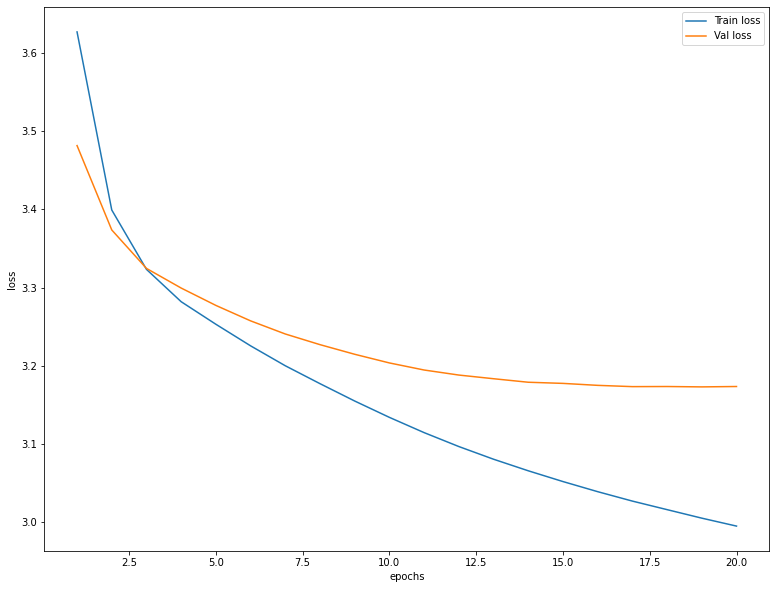

In [58]:
plt.figure(figsize=(13,10))

plt.plot(list(range(1,no_of_epochs+1)), history_rnn.history['loss'], label='Train loss')
plt.plot(list(range(1,no_of_epochs+1)), history_rnn.history['val_loss'], label='Val loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **2.4 [10 points] PREDICTING THE NEXT WORD**
    
<br />
    
**2.4.1** - Read the dataset `pp_text.csv`. Add only the  start token to each line, remove the last word and tokenize it using the tokenizer fit previously. Convert each sentence to a sequence vector and post-pad to a length of 30. This will be the input for the prediction phase.
    
</div>

In [59]:
# Read the data
file_path = "https://drive.google.com/uc?id=1sFolPhc31mqvCxC3JxORmur21e28XeA-&export=download"
df_pred = pd.read_csv(file_path)
df_pred.head()

,Text
0,When you make changes please always check if e...
1,I found them very similar
2,Give some overview of what the exercises are a...
3,Honestly I do not remember
4,Can you check the video


In [61]:
print(f'Shape of df_pred : {df_pred.shape}')

Shape of df_pred : (35, 1)


 Should we do preprocessing using the clean function defined above?

In [62]:
df_pred['last_word'] = df_pred['Text'].apply(lambda x: x.rsplit(' ',1)[1])
df_pred['Text'] = df_pred['Text'].apply(lambda x: x.rsplit(' ',1)[0]) # removing the last word using reverse split
df_pred['Text'] = df_pred['Text'].apply(lambda x: '<s> ' + x ) # adding initial token to sentence
df_pred.head()

,Text,last_word
0,<s> When you make changes please always check ...,working
1,<s> I found them very,similar
2,<s> Give some overview of what the exercises a...,there
3,<s> Honestly I do not,remember
4,<s> Can you check the,video


In [63]:
# adding the last word(y variable) as a column so that we can compare with the predicted word

df_pred['text_as_seq'] = tokenizer_tf.texts_to_sequences(df_pred['Text'])
df_pred['y_last_word'] = tokenizer_tf.texts_to_sequences(df_pred['last_word'])
df_pred.head() 

,Text,last_word,text_as_seq,y_last_word
0,<s> When you make changes please always check ...,working,"[1, 1064, 261, 24, 1319, 695, 109, 1004, 324, ...",[708]
1,<s> I found them very,similar,"[1, 49, 168, 193, 1580]",[676]
2,<s> Give some overview of what the exercises a...,there,"[1, 115, 1250, 533, 532, 9, 828, 86, 858, 1431...",[189]
3,<s> Honestly I do not,remember,"[1, 1295, 49, 517, 316]",[314]
4,<s> Can you check the,video,"[1, 2155, 261, 1004, 9]",[321]


In [65]:
# padding the prediction data
maxlen=30
X_pred_padded = tf.keras.preprocessing.sequence.pad_sequences(df_pred['text_as_seq'], maxlen =30, padding='post')

X_pred_padded.shape

(35, 30)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**2.4.2** - Define a simple RNN model with the trained weights of the trained RNN model for predicting the next word. You can make use of Keras function API to reuse the previously written code. The output of this new model is the last element of the RNN output defined earlier.
    
</div>

In [66]:
rnn_model.summary() # archtitecture of previous rnn model 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           1500300   
                                                                 
 rnn_layer (SimpleRNN)       (None, 30, 50)            17550     
                                                                 
 final_dense_layer (Dense)   (None, 30, 5001)          255051    
                                                                 
Total params: 1,772,901
Trainable params: 1,772,901
Non-trainable params: 0
_________________________________________________________________


**Creating a new rnn model with similar architecture but with return sequence = False, that would give us the hiddenstate of only the last element, needed to predict the next word**

In [67]:
new_inputs = Input(shape=(30,))
new_embedding = Embedding(input_dim= vocab_size+1, output_dim = 300, mask_zero =True)(new_inputs)
new_simple_rnn = SimpleRNN(50,input_shape= (300,),name ='rnn_layer')(new_embedding) #without return_sequences= True, which gives hidden_state of only the last element
new_outputs = Dense(vocab_size+1,activation= 'softmax',name ='final_dense_layer'  )(new_simple_rnn)

new_rnn_model = Model(inputs=new_inputs,outputs=new_outputs)

new_rnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 300)           1500300   
                                                                 
 rnn_layer (SimpleRNN)       (None, 50)                17550     
                                                                 
 final_dense_layer (Dense)   (None, 5001)              255051    
                                                                 
Total params: 1,772,901
Trainable params: 1,772,901
Non-trainable params: 0
_________________________________________________________________


In [68]:
# dictionary with layers names and its weights of the 1st rnn model. which we take share with the new rnn model

rnn_dic = {layer.name: layer.get_weights() for layer in rnn_model.layers} 

In [70]:
# setting weights in the new rnn model, using the weights from the old rnn model
new_rnn_model.layers[1].set_weights(rnn_dic['embedding']) # setting weights in embedding layer from previous rnn model
new_rnn_model.layers[2].set_weights(rnn_dic['rnn_layer']) # setting weights in rnn layer from previous rnn model
new_rnn_model.layers[3].set_weights(rnn_dic['final_dense_layer'])

In [71]:
df_pred.head()

,Text,last_word,text_as_seq,y_last_word
0,<s> When you make changes please always check ...,working,"[1, 1064, 261, 24, 1319, 695, 109, 1004, 324, ...",[708]
1,<s> I found them very,similar,"[1, 49, 168, 193, 1580]",[676]
2,<s> Give some overview of what the exercises a...,there,"[1, 115, 1250, 533, 532, 9, 828, 86, 858, 1431...",[189]
3,<s> Honestly I do not,remember,"[1, 1295, 49, 517, 316]",[314]
4,<s> Can you check the,video,"[1, 2155, 261, 1004, 9]",[321]


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.4.3** - Choose any sentence from the list of Prof. Protopapas's texts to predict the next word. Input this to the RNN model built for prediction and print the predicted word. Try this out with multiple sentences.
    
</div>

**We will predict the last word of every sentences in the PP_test. We will be adding that to the dataframe along with the actucal last word, so that we can compare the predicted and actual last word**

In [72]:
# creating predictions from the test set for all the sentences
predictions = new_rnn_model.predict(X_pred_padded)
predictions.shape

(35, 5001)

In [73]:
word_to_token = tokenizer_tf.word_index

In [74]:
token_to_word = {j:i for i,j in word_to_token.items() }

In [75]:
# finding the predicted last word for each of the sentences
predicted_words = []

for pred in predictions:
  idx = np.argmax(pred)
  word = token_to_word[idx]
  predicted_words.append(word)


In [76]:
df_pred['predicted_word'] = predicted_words

**Here we have predicted the last word for every sentence, with the help of dataframe we can see the acutual last word and predicted last word**

In [77]:
df_pred.head(33)

,Text,last_word,text_as_seq,y_last_word,predicted_word
0,<s> When you make changes please always check ...,working,"[1, 1064, 261, 24, 1319, 695, 109, 1004, 324, ...",[708],</s>
1,<s> I found them very,similar,"[1, 49, 168, 193, 1580]",[676],good
2,<s> Give some overview of what the exercises a...,there,"[1, 115, 1250, 533, 532, 9, 828, 86, 858, 1431...",[189],</s>
3,<s> Honestly I do not,remember,"[1, 1295, 49, 517, 316]",[314],even
4,<s> Can you check the,video,"[1, 2155, 261, 1004, 9]",[321],story
5,<s> A&A when you have,time,"[1, 1064, 261, 1676]",[12],never
6,<s> otherwise we will need to start working on,it,"[1, 887, 1309, 2109, 299, 455, 302, 708, 231]",[16],the
7,<s> I do believe these students will know CNNs...,end,"[1, 49, 517, 191, 3265, 1320, 2109, 46, 1580, ...",[54],film
8,<s> They are,ready,"[1, 1431, 828]",[1491],its
9,<s> today I have as much as you can,handle,"[1, 528, 49, 1676, 301, 17, 301, 261, 2155]",[2437],</s>


**Predicting One sentence at a time**

In [85]:
print(f'predicting the next word of the second senetence- " {df_pred.iloc[1]["Text"]} "')
# X_pred_padded[0] # predicting the next word of the first senetence

predicting the next word of the second senetence- " <s> I found them very "


In [86]:
# changinf the shape of input variable
test_x = X_pred_padded[1].reshape(1,-1)
test_x.shape

(1, 30)

In [90]:
print(f'predicting the next word of the second senetence- " {df_pred.iloc[1]["Text"]} "')
print('-----')
preds = new_rnn_model.predict(test_x) # getting the list of probabilty
idx = np.argmax(preds) # getting the index from the prob districution of the highest
print(f"the predicted next word of the second sentece is : {token_to_word[idx]}, the actual last word is : {df_pred['last_word'][0]}")

predicting the next word of the second senetence- " <s> I found them very "
-----
the predicted next word of the second sentece is : good, the actual last word is : working


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.4.4** - Do you notice any pattern in the predicted words? Do they seem approriate to the context of the texts as you understand it? What do you attribute this discrepency to? How can you resolve it?

Answer in less than 150 words.
    
</div>

**Type your answer here**

We see that most of the predicted words to be the startig token '<s->", the reason for that might be the vanishing gradients that we see in RNN models. The fixed weights of RNN layers will add to this. Here, we also have a comparitively small dataset.

At the sametime, we also predicted some words which seems appropriate to the context. 

We could improve this model by solving the issue of vanishing gradients and introducing more parameter which would be a function of the input word and the previous hidden states/

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### **2.5 [7 points] TRAINING AND PREDICTING WITH A DIFFERENT DATASET**
<br />
    
**2.5.1** - Read the dataset `cleaned_sarcasm.csv`. This dataset has been preprocessed for you, all you need to do is tokenize, convert to sequence and pad it, similar to 2.2.1, 2.2.2 and 2.3.1.
    
</div>

In [91]:
# Read the data
file_path = "https://drive.google.com/uc?id=1kHZIXEcf_t0t2GcxtafF3mL0kuoC4etf&export=download"
df_sarcasm = pd.read_csv(file_path)
df_sarcasm.head()

,text
0,you do know west teams play against west teams...
1,they were underdogs earlier today but since gr...
2,you dont have to you have a good build buy gam...
3,i think a significant amount would be against ...
4,ayy bb wassup it makes a bit more sense in con...


In [92]:
print(f'Shape of new Datafame(sarcasm) {df_sarcasm.shape}')

Shape of new Datafame(sarcasm) (289506, 1)


In [93]:
# Tokenize the data
df_sarcasm['tokens'] = tokenizer_tf.texts_to_sequences(df_sarcasm['text'])
df_sarcasm.head(8)

,text,tokens
0,you do know west teams play against west teams...,"[261, 517, 46, 1071, 194, 1071, 592, 2573, 133]"
1,they were underdogs earlier today but since gr...,"[1431, 739, 654, 528, 222, 116, 53, 2444, 9, 3..."
2,you dont have to you have a good build buy gam...,"[261, 29, 1676, 455, 261, 1676, 214, 8, 1784, ..."
3,i think a significant amount would be against ...,"[49, 32, 214, 2387, 925, 11, 557, 2581, 2543, ..."
4,ayy bb wassup it makes a bit more sense in con...,"[16, 65, 214, 134, 592, 198, 165, 1732]"
5,because its what really bothers him and its a ...,"[1536, 7, 532, 15, 162, 86, 7, 214, 2019, 533,..."
6,because theyre not real human beings with actu...,"[1536, 423, 316, 66, 317, 2908, 421, 647, 1297..."
7,tbh that giant dent was probably made by the g...,"[143, 1322, 539, 127, 26, 1257, 9, 1036]"


In [95]:
data = tf.keras.preprocessing.sequence.pad_sequences(df_sarcasm['tokens'],maxlen=31,padding='post')
data.shape

(289506, 31)

In [96]:
df_sarcasm['text'][0]

'you do know west teams play against west teams more than east teams right'

In [97]:
data[0]

array([ 261,  517,   46, 1071,  194, 1071,  592, 2573,  133,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [98]:
#creating X and Y 
X = data[:,0:30]
y = data[:,1:31]

In [99]:
print(f'example of train_x {X[0]}')
print(f'example of train_y {y[0]}')
# we can see that the elements in y, is the next element in X

example of train_x [ 261  517   46 1071  194 1071  592 2573  133    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
example of train_y [ 517   46 1071  194 1071  592 2573  133    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.5.2** - Train your RNN model with this data and plot the train and validation trace plot. This part is similar to 2.3.2, 2.3.3 and 2.3.4.
    
</div>

In [100]:
# Your code here
inputs = Input(shape=(30,))
embedding = Embedding(input_dim= vocab_size+1,output_dim= 300,mask_zero =True)(inputs)
rnn_layer = SimpleRNN(50,input_shape=(300,30), return_sequences=True)(embedding) # we can have the input_shape as (300,) as well - maybe (300,None) might also work
outputs = Dense(vocab_size+1,activation='softmax')(rnn_layer)
rnn_model_sarcasm = Model(inputs=inputs,outputs=outputs)


In [101]:
rnn_model_sarcasm.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',
                            metrics= ['accuracy'])

In [ ]:
history_sarcasm= rnn_model_sarcasm.fit(X,y,epochs=20,validation_split=0.2,batch_size=512)

Epoch 1/20
453/453 [==============================] - 42s 90ms/step - loss: 2.6749 - accuracy: 0.0693 - val_loss: 2.6890 - val_accuracy: 0.0727
Epoch 2/20
453/453 [==============================] - 41s 91ms/step - loss: 2.4514 - accuracy: 0.0992 - val_loss: 2.5156 - val_accuracy: 0.1172
Epoch 3/20
453/453 [==============================] - 40s 87ms/step - loss: 2.3135 - accuracy: 0.1392 - val_loss: 2.4150 - val_accuracy: 0.1385
Epoch 4/20
453/453 [==============================] - 39s 87ms/step - loss: 2.2434 - accuracy: 0.1521 - val_loss: 2.3657 - val_accuracy: 0.1513
Epoch 5/20
453/453 [==============================] - 39s 87ms/step - loss: 2.1958 - accuracy: 0.1665 - val_loss: 2.3296 - val_accuracy: 0.1618
Epoch 6/20
453/453 [==============================] - 40s 87ms/step - loss: 2.1681 - accuracy: 0.1731 - val_loss: 2.3114 - val_accuracy: 0.1646
Epoch 7/20
453/453 [==============================] - 40s 87ms/step - loss: 2.1509 - accuracy: 0.1758 - val_loss: 2.2992 - val_accuracy:

In [ ]:
history_sarcasm= rnn_model_sarcasm.fit(X,y,epochs=20,validation_split=0.2,batch_size=512)

Epoch 1/20
453/453 [==============================] - 39s 85ms/step - loss: 2.5142 - accuracy: 0.0892 - val_loss: 2.5450 - val_accuracy: 0.1027
Epoch 2/20
453/453 [==============================] - 38s 84ms/step - loss: 2.3282 - accuracy: 0.1342 - val_loss: 2.4194 - val_accuracy: 0.1403
Epoch 3/20
453/453 [==============================] - 38s 83ms/step - loss: 2.2432 - accuracy: 0.1547 - val_loss: 2.3632 - val_accuracy: 0.1556
Epoch 4/20
453/453 [==============================] - 37s 83ms/step - loss: 2.1964 - accuracy: 0.1674 - val_loss: 2.3322 - val_accuracy: 0.1605
Epoch 5/20
453/453 [==============================] - 38s 83ms/step - loss: 2.1707 - accuracy: 0.1719 - val_loss: 2.3154 - val_accuracy: 0.1633
Epoch 6/20
453/453 [==============================] - 38s 83ms/step - loss: 2.1533 - accuracy: 0.1749 - val_loss: 2.3015 - val_accuracy: 0.1657
Epoch 7/20
453/453 [==============================] - 38s 85ms/step - loss: 2.1401 - accuracy: 0.1772 - val_loss: 2.2915 - val_accuracy:

In [ ]:
plt.figure(figsize=(13,10))

plt.plot(list(range(no_of_epochs)), history_sarcasm.history['loss'], label='Train loss')
plt.plot(list(range(no_of_epochs)), history_sarcasm.history['val_loss'], label='Val loss')
plt.xlabel('epochs')
plt.legend()
plt.ylabel('loss')
plt.show();

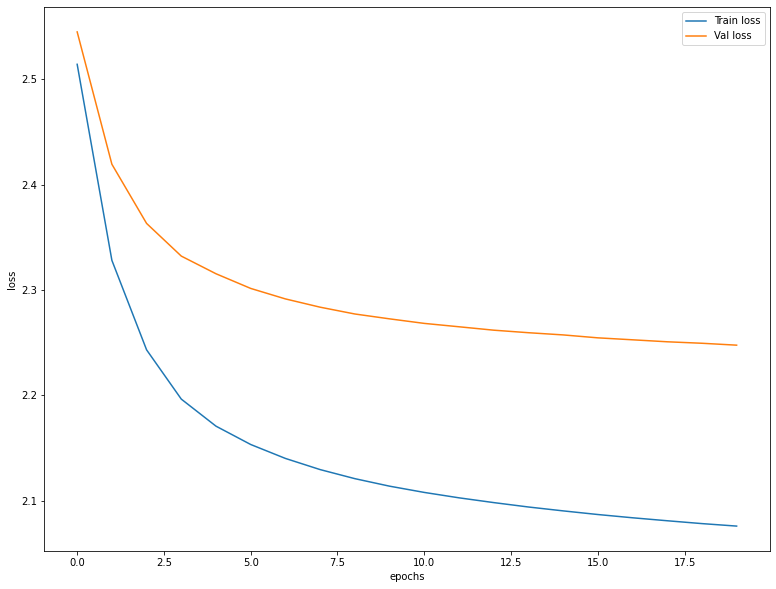

In [ ]:
plt.figure(figsize=(13,10))

plt.plot(list(range(no_of_epochs)), history_sarcasm.history['loss'], label='Train loss')
plt.plot(list(range(no_of_epochs)), history_sarcasm.history['val_loss'], label='Val loss')
plt.xlabel('epochs')
plt.legend()
plt.ylabel('loss')
plt.show();

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.5.3** - Repeat 2.4.1, 2.4.2 and 2.4.3 with the RNN model trained using the new dataset.

</div>

In [ ]:
new_inputs = Input(shape=(30,))
new_embedding = Embedding(input_dim= vocab_size+1, output_dim = 300, mask_zero =True)(new_inputs)
new_simple_rnn = SimpleRNN(50,input_shape= (300,),name ='rnn_layer')(new_embedding) #without return_sequences= True, which gives hidden_state of only the last element
new_outputs = Dense(vocab_size+1,activation= 'softmax',name ='final_dense_layer'  )(new_simple_rnn)

new_rnn_model = Model(inputs=new_inputs,outputs=new_outputs)

new_rnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 300)           1500300   
                                                                 
 rnn_layer (SimpleRNN)       (None, 50)                17550     
                                                                 
 final_dense_layer (Dense)   (None, 5001)              255051    
                                                                 
Total params: 1,772,901
Trainable params: 1,772,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn_sarcasm_dic = {layer.name: layer.get_weights() for layer in rnn_model_sarcasm.layers} 

In [ ]:
# setting weights in the new rnn model
new_rnn_model.layers[1].set_weights(rnn_sarcasm_dic['embedding_1']) # setting weights in embedding layer from previous rnn model
new_rnn_model.layers[2].set_weights(rnn_sarcasm_dic['simple_rnn']) # setting weights in rnn layer from previous rnn model
new_rnn_model.layers[3].set_weights(rnn_sarcasm_dic['dense'])

In [ ]:
predictions = new_rnn_model.predict(X_pred_padded)
predictions.shape

(35, 5001)

In [ ]:
# converting tokens back to word
word_to_token = tokenizer_tf.word_index

token_to_word = {j:i for i,j in word_to_token.items() }
token_to_word[0] = '</s>'

In [ ]:
# finding the predicted last word for each of the sentences
predicted_words = []

for pred in predictions:
  idx = np.argmax(pred)
  word = token_to_word[idx]
  predicted_words.append(word)



In [ ]:
df_pred['predicted_word_sarcasm'] = predicted_words

In [ ]:
df_pred.head(20)

,Text,last_word,text_as_seq,y_last_word,predicted_word,predicted_word_sarcasm
0,<s> When you make changes please always check ...,working,"[1, 1064, 261, 24, 1319, 695, 109, 1004, 324, ...",[708],</s>,a
1,<s> I found them very,similar,"[1, 49, 168, 193, 1580]",[676],good,much
2,<s> Give some overview of what the exercises a...,there,"[1, 115, 1250, 533, 532, 9, 828, 86, 858, 1431...",[189],</s>,</s>
3,<s> Honestly I do not,remember,"[1, 1295, 49, 517, 316]",[314],like,know
4,<s> Can you check the,video,"[1, 2155, 261, 1004, 9]",[321],story,to
5,<s> A&A when you have,time,"[1, 1064, 261, 1676]",[12],seen,a
6,<s> otherwise we will need to start working on,it,"[1, 887, 1309, 2109, 299, 455, 302, 708, 231]",[16],its,the
7,<s> I do believe these students will know CNNs...,end,"[1, 49, 517, 191, 3265, 1320, 2109, 46, 1580, ...",[54],film,</s>
8,<s> They are,ready,"[1, 1431, 828]",[1491],dont,the
9,<s> today I have as much as you can,handle,"[1, 528, 49, 1676, 301, 17, 301, 261, 2155]",[2437],</s>,get


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.5.4** - How do the results with the new dataset compare to the previous ones? Why do you think so? 

Answer in less than 100 words.
    
Since the dataset was longer, we have better result with the new model trained on the df_sarcasm data

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### **2.6 [4 points] COMPLETING THE SENTENCE**
<br />

**2.6.1** Until now we have predicted a single word for a given sentence. However, what if he meant more than one word when he typed in `...`

We will now predict multiple words for each input sentence. To do this we will first predict one word, append this word to the input text and then predict once more with the updated input. Continue doing this to predict 5 words or until the end token `</s>` (whichever comes first). 

</div>

- first we will have a sentence
- we will post pad to length =30
- chnage the shape so that it will go as input to the model.
- once we get the output add the word into the string, and repeat the process from start, till we do this 5 times or its predicts stops,

In [ ]:
# Your code here
final_sentence = []
def input_sentence(sentence):
  predicted_word = ' '
  count=0

  while True:
      if (count >= 5) or predicted_word == '</s>':
        break
      count +=1
      # print(sentence)
      input_string = [sentence]

      input_as_tokens= tokenizer_tf.texts_to_sequences(input_string)

      input_array = tf.keras.preprocessing.sequence.pad_sequences(input_as_tokens,maxlen=30,padding='post')

      preds = new_rnn_model.predict(input_array)

      idx = np.argmax(preds)
      predicted_word = token_to_word[idx]
      # print(predicted_word)



      sentence = sentence+ ' ' + predicted_word


  return sentence




In [ ]:
input_string = 'this is one of'

In [ ]:
print(f'For the input sentence: "{input_string}", the predicted output sentence is "{input_sentence(input_string)}"')

For the input sentence: "this is one of", the predicted output sentence is "this is one of course film would like it"
